In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
print(pd.__version__)

2.2.2


**Parte 1 analisi statistica**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. 
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi. 

1. Importiamo il dataset:

In [2]:
integrate_titles = pd.read_csv("integrate_titles2.csv")

visualizziamo il dataset

In [3]:
integrate_titles.head()

,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,production_countries,...,tmdb_popularity,tmdb_score,director,country,date_added,rating,duration,year,month,day
0,0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],...,0.601,NaN,NaN,United States,2021-02-09,TV-MA,1 Season,2021.0,2.0,9.0
1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",['US'],...,99.713,7.783,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0
2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",['US'],...,33.160,7.406,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0
3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",['US'],...,74.191,7.200,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0
4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",['GB'],...,20.964,7.804,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0


In [4]:
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          4715 non-null   int64  
 1   Unnamed: 0            4715 non-null   int64  
 2   id                    4715 non-null   object 
 3   title                 4715 non-null   object 
 4   type                  4715 non-null   object 
 5   release_year          4715 non-null   int64  
 6   age_certification     2857 non-null   object 
 7   runtime               4715 non-null   int64  
 8   genres                4715 non-null   object 
 9   production_countries  4715 non-null   object 
 10  seasons               1716 non-null   float64
 11  imdb_id               4224 non-null   object 
 12  imdb_score            4170 non-null   float64
 13  imdb_votes            4165 non-null   float64
 14  tmdb_popularity       4679 non-null   float64
 15  tmdb_score           

**Parte 1. Statistiche di base e analisi OLAP**

Calcoliamo alcune statistiche di base, sulle colonne imdb_score e tmdb_score:
1. Media;
2. Deviazione standard;
3. Varianza;
4. Moda;
5. Mediana.

prima di tutto verifichiamo che non ci siano valori nulli

In [5]:
null_values = integrate_titles.isnull().sum()
print("Valori Null nel dataset", null_values)


Valori Null nel dataset Unnamed: 0.1               0
Unnamed: 0                 0
id                         0
title                      0
type                       0
release_year               0
age_certification       1858
runtime                    0
genres                     0
production_countries       0
seasons                 2999
imdb_id                  491
imdb_score               545
imdb_votes               550
tmdb_popularity           36
tmdb_score               159
director                1695
country                  505
date_added                 1
rating                     2
duration                   1
year                       1
month                      1
day                        1
dtype: int64


proviamo a riempire questi valori nulli con il valore medio degli elementi non nulli. Iniziamo con imdb

In [6]:
#calcolo media non nulli
#trovo indici nulli di ibmdb_score
indici_nulli_imdb_score = integrate_titles[integrate_titles['imdb_score'].isnull()].index
#trovo indici non nulli di ibmdb_score
indici_non_nulli_imdb_score = integrate_titles[integrate_titles['imdb_score'].notnull()].index
#calcolo media non nulli di ibmdb_score
media_imdb_score = integrate_titles['imdb_score'].mean()
print("Media valori non nulli di imdb_score", media_imdb_score)
#sostituzione con loc su indici nulli 
integrate_titles.loc[indici_nulli_imdb_score, 'imdb_score'] = media_imdb_score

#proviamo a vedere se ha avuto effetto (dovrebbe esserci 0 in corrispondenza di imdb_score)
null_values = integrate_titles.isnull().sum()
print("Valori Null nel dataset", null_values)

Media valori non nulli di imdb_score 6.595947242206234
Valori Null nel dataset Unnamed: 0.1               0
Unnamed: 0                 0
id                         0
title                      0
type                       0
release_year               0
age_certification       1858
runtime                    0
genres                     0
production_countries       0
seasons                 2999
imdb_id                  491
imdb_score                 0
imdb_votes               550
tmdb_popularity           36
tmdb_score               159
director                1695
country                  505
date_added                 1
rating                     2
duration                   1
year                       1
month                      1
day                        1
dtype: int64


stessa cosa per tmdb

In [7]:
#codice qui 
#trovo indici nulli di ibmdb_score
indici_nulli_tmdb_score = integrate_titles[integrate_titles['tmdb_score'].isnull()].index
#trovo indici non nulli di ibmdb_score
indici_non_nulli_tmdb_score = integrate_titles[integrate_titles['tmdb_score'].notnull()].index

#calcolo media non nulli
media_tmdb_score = integrate_titles['tmdb_score'].mean()
#sostituzione
integrate_titles.loc[indici_nulli_tmdb_score, 'tmdb_score'] = media_tmdb_score

#proviamo a vedere se ha avuto effetto (adesso dovrebbe esserci 0 in corrispondenza anche di tmdb_score)
null_values = integrate_titles.isnull().sum()
print("Valori Null nel dataset", null_values)

Valori Null nel dataset Unnamed: 0.1               0
Unnamed: 0                 0
id                         0
title                      0
type                       0
release_year               0
age_certification       1858
runtime                    0
genres                     0
production_countries       0
seasons                 2999
imdb_id                  491
imdb_score                 0
imdb_votes               550
tmdb_popularity           36
tmdb_score                 0
director                1695
country                  505
date_added                 1
rating                     2
duration                   1
year                       1
month                      1
day                        1
dtype: int64


calcoliamo quindi le statistiche richieste

In [8]:
#media imdb_score:
media_imdb_score = integrate_titles['imdb_score'].mean()
print("Media di imdb_score dopo 'completamento' dei valori nulli: ", media_imdb_score)
#deviazione standard imdb_score:
std_imdb_score = integrate_titles['imdb_score'].std()
print("Deviazione standard di imdb_score dopo 'completamento' dei valori nulli: ", std_imdb_score)
#varianza imdb_score:
var_imdb_score = integrate_titles['imdb_score'].var()
print("Varianza di imdb_score dopo 'completamento' dei valori nulli: ", var_imdb_score)
#moda imdb_score:
moda_imdb_score = integrate_titles['imdb_score'].mode()[0]
print("Moda di imdb_score dopo 'completamento' dei valori nulli: ", moda_imdb_score)
#mediana imdb_score:
mediana_imdb_score = integrate_titles['imdb_score'].median()
print("Mediana di imdb_score dopo 'completamento' dei valori nulli: ", mediana_imdb_score)


#media tmdb_score:
media_tmdb_score = integrate_titles['tmdb_score'].mean()
print("Media di tmdb_score dopo 'completamento' dei valori nulli: ", media_tmdb_score)
#deviazione standard tmdb_score:
std_tmdb_score = integrate_titles['tmdb_score'].std()
print("Deviazione standard di tmdb_score dopo 'completamento' dei valori nulli: ", std_tmdb_score)
#varianza tmdb_score:
var_tmdb_score = integrate_titles['tmdb_score'].var()
print("Varianza di tmdb_score dopo 'completamento' dei valori nulli: ", var_tmdb_score)
#moda tmdb_score:
moda_tmdb_score = integrate_titles['tmdb_score'].mode()[0]
print("Moda di tmdb_score dopo 'completamento' dei valori nulli: ", moda_tmdb_score)
#mediana tmdb_score:
mediana_tmdb_score = integrate_titles['tmdb_score'].median()
print("Mediana di tmdb_score dopo 'completamento' dei valori nulli: ", mediana_tmdb_score)

Media di imdb_score dopo 'completamento' dei valori nulli:  6.595947242206234
Deviazione standard di imdb_score dopo 'completamento' dei valori nulli:  1.0483376246330742
Varianza di imdb_score dopo 'completamento' dei valori nulli:  1.0990117752213164
Moda di imdb_score dopo 'completamento' dei valori nulli:  6.595947242206234
Mediana di imdb_score dopo 'completamento' dei valori nulli:  6.595947242206234
Media di tmdb_score dopo 'completamento' dei valori nulli:  6.73794446883231
Deviazione standard di tmdb_score dopo 'completamento' dei valori nulli:  1.1311522709645765
Varianza di tmdb_score dopo 'completamento' dei valori nulli:  1.279505460108319
Moda di tmdb_score dopo 'completamento' dei valori nulli:  7.0
Mediana di tmdb_score dopo 'completamento' dei valori nulli:  6.8


stampiamo i valori di num_awards per verificare che moda e mediana siano calcolate nel modo corretto. Sortiamo l'array in ordine crescente per visualizzare la mediana.

In [9]:
sorted = integrate_titles['imdb_score'].sort_values() 
print(sorted.tolist())

[1.5, 1.6, 1.7, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,

ora facciamo la stessa cosa, ma senza riempire i valori nulli.
Le funzioni che calcolano le statistiche in pandas, hanno un'opzione dropna=True di default, quindi non considerano i valori nulli, in automatico.  

In [10]:
integrate_titles = pd.read_csv("integrate_titles2.csv") 

In [11]:
#codice qui 

#media imdb_score:
media_imdb_score = integrate_titles['imdb_score'].mean(skipna=False)
print("Media di imdb_score senza 'completamento' ed includendo i null: ", media_imdb_score)
#deviazione standard imdb_score:
std_imdb_score = integrate_titles['imdb_score'].std(skipna=False)
print("Deviazione standard di imdb_score senza 'completamento' ed includendo i null: ", std_imdb_score)
#varianza imdb_score:
var_imdb_score = integrate_titles['imdb_score'].var(skipna=False)
print("Varianza di imdb_score senza 'completamento' ed includendo i null: ", var_imdb_score)
#moda imdb_score:
moda_imdb_score = integrate_titles['imdb_score'].mode(dropna=False)[0]
print("Moda di imdb_score senza 'completamento' ed includendo i null: ", moda_imdb_score)
#mediana imdb_score:
mediana_imdb_score = integrate_titles['imdb_score'].median(skipna=False)
print("Mediana di imdb_score senza 'completamento' ed includendo i null: ", mediana_imdb_score)


#media tmdb_score:
media_tmdb_score = integrate_titles['tmdb_score'].mean(skipna=False)
print("Media di tmdb_score senza 'completamento' ed includendo i null: ", media_tmdb_score)
#deviazione standard tmdb_score:
std_tmdb_score = integrate_titles['tmdb_score'].std(skipna=False)
print("Deviazione standard di tmdb_score senza 'completamento' ed includendo i null: ", std_tmdb_score)
#varianza tmdb_score:
var_tmdb_score = integrate_titles['tmdb_score'].var(skipna=False)
print("Varianza di tmdb_score senza 'completamento' ed includendo i null: ", var_tmdb_score)
#moda tmdb_score:
moda_tmdb_score = integrate_titles['tmdb_score'].mode(dropna=False)[0]
print("Moda di tmdb_score senza 'completamento' ed includendo i null: ", moda_tmdb_score)
#mediana tmdb_score:
mediana_tmdb_score = integrate_titles['tmdb_score'].median(skipna=False)
print("Mediana di tmdb_score senza 'completamento' ed includendo i null: ", mediana_tmdb_score)





Media di imdb_score senza 'completamento' ed includendo i null:  nan
Deviazione standard di imdb_score senza 'completamento' ed includendo i null:  nan
Varianza di imdb_score senza 'completamento' ed includendo i null:  nan
Moda di imdb_score senza 'completamento' ed includendo i null:  nan
Mediana di imdb_score senza 'completamento' ed includendo i null:  nan
Media di tmdb_score senza 'completamento' ed includendo i null:  nan
Deviazione standard di tmdb_score senza 'completamento' ed includendo i null:  nan
Varianza di tmdb_score senza 'completamento' ed includendo i null:  nan
Moda di tmdb_score senza 'completamento' ed includendo i null:  7.0
Mediana di tmdb_score senza 'completamento' ed includendo i null:  nan


come dimostrazione, eliminiamo le righe che contengono un valore nullo su imdb_score e ripetiamo le statistiche 

In [12]:
integrate_titles = pd.read_csv("integrate_titles2.csv") 
integrate_titles = integrate_titles.dropna(axis=0, subset=['imdb_score'])

come vediamo, la colonna imdb_score ha zero valori nulli, li abbiamo tolti usando dropna(axis=0, subset=['imdb_score'])

In [13]:
null_values = integrate_titles.isnull().sum()
print("Valori Null nel dataset", null_values)
integrate_titles.info()

Valori Null nel dataset Unnamed: 0.1               0
Unnamed: 0                 0
id                         0
title                      0
type                       0
release_year               0
age_certification       1577
runtime                    0
genres                     0
production_countries       0
seasons                 2582
imdb_id                    0
imdb_score                 0
imdb_votes                 5
tmdb_popularity           31
tmdb_score               102
director                1536
country                  380
date_added                 1
rating                     2
duration                   1
year                       1
month                      1
day                        1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4170 entries, 1 to 4714
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          4170 non-null   int64  
 1   Unnamed

A questo punto, usiamo quest'ultima versione  e predisponiamo il nostro dataset per un'analisi OLAP. Per prima cosa, quantizziamo lo score di IMBD. Possiamo usare questa quantizzazione:
1. BAD = [0,4.9];
2. SUFFICIENT = [5,5.9];
3. GOOD = [6,6.9];
4. VERY GOOD = [7,7.9];
5. EXCELLENT = [8,10].

**tip** 

Dobbiamo utilizzare la funzione between di pandas (between(min_range,max_range,'both'), la funzione loc per accedere ai valori del dataframe e creare una nuova colonna che chiamiamo 'imdb_score_quant'


In [14]:
#codice qui 
quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']

integrate_titles.loc[integrate_titles['imdb_score'].between(0, 4.9), 'imdb_score_quant']=quantize_imdb_score[0]
integrate_titles.loc[integrate_titles['imdb_score'].between(5, 5.9), 'imdb_score_quant']=quantize_imdb_score[1]
integrate_titles.loc[integrate_titles['imdb_score'].between(6, 6.9), 'imdb_score_quant']=quantize_imdb_score[2]
integrate_titles.loc[integrate_titles['imdb_score'].between(7, 7.9), 'imdb_score_quant']=quantize_imdb_score[3]
integrate_titles.loc[integrate_titles['imdb_score'].between(8, 10), 'imdb_score_quant']=quantize_imdb_score[4]





visualizziamo la colonna che abbiamo aggiunto 

In [15]:
print(integrate_titles['imdb_score_quant'])

1       EXCELLENT
2       VERY GOOD
3       VERY GOOD
4       EXCELLENT
5       EXCELLENT
          ...    
4709         GOOD
4710    EXCELLENT
4711    EXCELLENT
4713    EXCELLENT
4714         GOOD
Name: imdb_score_quant, Length: 4170, dtype: object


Facciamo la stessa cosa per gli anni di uscita (release_year). Usiamo questa quantizzazione:

1. VERY OLD = [1900,1980];
3. OLD = [1981,2000].
4. RECENT = [2001,2015];
5. VERY RECENT = [2016,2023].



In [16]:
quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']
integrate_titles.loc[integrate_titles['release_year'].between(1900, 1980), 'imdb_release_year_quant']=quantize_release_year[0]
integrate_titles.loc[integrate_titles['release_year'].between(1981, 2000), 'imdb_release_year_quant']=quantize_release_year[1]
integrate_titles.loc[integrate_titles['release_year'].between(2001, 2015), 'imdb_release_year_quant']=quantize_release_year[2]
integrate_titles.loc[integrate_titles['release_year'].between(2016, 2023), 'imdb_release_year_quant']=quantize_release_year[3]

visualizziamo anche questa colonna

In [17]:
print(integrate_titles['imdb_release_year_quant'])


1          VERY OLD
2          VERY OLD
3          VERY OLD
4          VERY OLD
5          VERY OLD
           ...     
4709    VERY RECENT
4710    VERY RECENT
4711    VERY RECENT
4713    VERY RECENT
4714    VERY RECENT
Name: imdb_release_year_quant, Length: 4170, dtype: object


Infine, utilizziamo TYPE che risulta già quantizzato.

In [18]:
integrate_titles['type'].isnull().sum()

0

visualizziamo i possibili valori di type

**tip** usiamo la funzione unique di numpy 

In [19]:
quantize_type = np.unique(integrate_titles['type'])
print(quantize_type)

['MOVIE' 'SHOW']


come vediamo sono soltanto MOVIE and SHOW.

il programma a cui sono iscritti gli studenti è già discreto e quantizzato. Visualizziamo allora le colonne aggiunte

**Parte 2. Visualizzazione dei dati e OLAP**

Abbiamo visto che esistono diverse modalita' di visualizzazione dei dati. 

In base al tipo di dato, alcune sono appropriate, altre possono non esserlo. 

La visualizzazione dei dati dipende da cosa vogliamo **comunicare**
con i dati. 

Proviamo a visualizzare il dato in forma quantizzata per OLAP, poi faremo alcune visualizzazioni. Dobbiamo prima di tutto contare il numero di occorrenze di ciascun valore. Sarà sufficiente usare la funzione value_counts di pandas. 
Ricordiamo che abbiamo:
- 5 valori possibili per Score;
- 4 valori possibili per release_year;
- 2 valori possibili per type

In [31]:
# Creiamo un DataFrame vuoto per i risultati
results = pd.DataFrame(columns=['Type', 'Release Year', 'Score', 'Count'])

for z in range(0,len(quantize_type)):
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      key = f"{quantize_type[z]}_{quantize_release_year[j]}_{quantize_imdb_score[i]}"
      count = counts.get(key, 0)
      # Aggiungiamo i risultati al DataFrame
      results.loc[len(results)] = [quantize_type[z], quantize_release_year[j], quantize_imdb_score[i], count]
print(results)

     Type Release Year       Score  Count
0   MOVIE     VERY OLD         LOW      2
1   MOVIE     VERY OLD  SUFFICIENT     19
2   MOVIE     VERY OLD        GOOD     45
3   MOVIE     VERY OLD   VERY GOOD     38
4   MOVIE     VERY OLD   EXCELLENT      6
5   MOVIE          OLD         LOW     18
6   MOVIE          OLD  SUFFICIENT     41
7   MOVIE          OLD        GOOD     82
8   MOVIE          OLD   VERY GOOD     41
9   MOVIE          OLD   EXCELLENT      7
10  MOVIE       RECENT         LOW     41
11  MOVIE       RECENT  SUFFICIENT    122
12  MOVIE       RECENT        GOOD    167
13  MOVIE       RECENT   VERY GOOD    149
14  MOVIE       RECENT   EXCELLENT     46
15  MOVIE  VERY RECENT         LOW    189
16  MOVIE  VERY RECENT  SUFFICIENT    443
17  MOVIE  VERY RECENT        GOOD    683
18  MOVIE  VERY RECENT   VERY GOOD    398
19  MOVIE  VERY RECENT   EXCELLENT     45
20   SHOW     VERY OLD         LOW      0
21   SHOW     VERY OLD  SUFFICIENT      1
22   SHOW     VERY OLD        GOOD

Per prima cosa, facciamo uno **slicing** rispetto a type

In [32]:
print('MOVIE')
# Selezioniamo solo le righe che corrispondono al tipo 'MOVIE'
movie_results = results.loc[results['Type'] == 'MOVIE']

# Stampa i risultati
print(movie_results)

MOVIE
     Type Release Year       Score  Count
0   MOVIE     VERY OLD         LOW      2
1   MOVIE     VERY OLD  SUFFICIENT     19
2   MOVIE     VERY OLD        GOOD     45
3   MOVIE     VERY OLD   VERY GOOD     38
4   MOVIE     VERY OLD   EXCELLENT      6
5   MOVIE          OLD         LOW     18
6   MOVIE          OLD  SUFFICIENT     41
7   MOVIE          OLD        GOOD     82
8   MOVIE          OLD   VERY GOOD     41
9   MOVIE          OLD   EXCELLENT      7
10  MOVIE       RECENT         LOW     41
11  MOVIE       RECENT  SUFFICIENT    122
12  MOVIE       RECENT        GOOD    167
13  MOVIE       RECENT   VERY GOOD    149
14  MOVIE       RECENT   EXCELLENT     46
15  MOVIE  VERY RECENT         LOW    189
16  MOVIE  VERY RECENT  SUFFICIENT    443
17  MOVIE  VERY RECENT        GOOD    683
18  MOVIE  VERY RECENT   VERY GOOD    398
19  MOVIE  VERY RECENT   EXCELLENT     45


visualizziamo ora questa matrice, con una heatmap. Dobbiamo usare matplotlib e la funzione imshow.

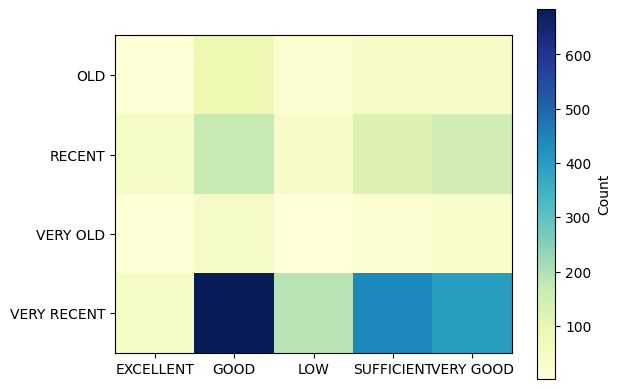

In [34]:
# Trasformiamo i dati in una matrice utilizzando il metodo pivot
matrix = movie_results.pivot(index='Release Year', columns='Score', values='Count')
# Creiamo la heatmap utilizzando imshow
plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')

# Aggiungiamo una colorbar per indicare il valore dei colori
plt.colorbar(label='Count')

# Impostiamo le etichette degli assi
plt.xticks(np.arange(len(matrix.columns)), matrix.columns)
plt.yticks(np.arange(len(matrix.index)), matrix.index)

# Mostriamo il grafico
plt.show()

In [35]:
print('SHOW')

# Selezioniamo solo le righe che corrispondono al tipo 'MOVIE'
show_results = results.loc[results['Type'] == 'SHOW']

# Stampa i risultati
print(show_results)

SHOW
    Type Release Year       Score  Count
20  SHOW     VERY OLD         LOW      0
21  SHOW     VERY OLD  SUFFICIENT      1
22  SHOW     VERY OLD        GOOD      0
23  SHOW     VERY OLD   VERY GOOD      0
24  SHOW     VERY OLD   EXCELLENT      4
25  SHOW          OLD         LOW      0
26  SHOW          OLD  SUFFICIENT      2
27  SHOW          OLD        GOOD     16
28  SHOW          OLD   VERY GOOD     20
29  SHOW          OLD   EXCELLENT     12
30  SHOW       RECENT         LOW      9
31  SHOW       RECENT  SUFFICIENT     31
32  SHOW       RECENT        GOOD     48
33  SHOW       RECENT   VERY GOOD     92
34  SHOW       RECENT   EXCELLENT     94
35  SHOW  VERY RECENT         LOW     43
36  SHOW  VERY RECENT  SUFFICIENT    122
37  SHOW  VERY RECENT        GOOD    377
38  SHOW  VERY RECENT   VERY GOOD    504
39  SHOW  VERY RECENT   EXCELLENT    213


stessa cosa per show

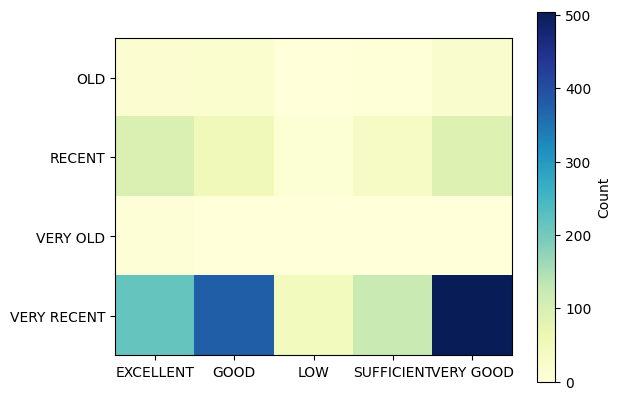

In [36]:
# Trasformiamo i dati in una matrice utilizzando il metodo pivot
matrix = show_results.pivot(index='Release Year', columns='Score', values='Count')
# Creiamo la heatmap utilizzando imshow
plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')

# Aggiungiamo una colorbar per indicare il valore dei colori
plt.colorbar(label='Count')

# Impostiamo le etichette degli assi
plt.xticks(np.arange(len(matrix.columns)), matrix.columns)
plt.yticks(np.arange(len(matrix.index)), matrix.index)

# Mostriamo il grafico
plt.show()



Notiamo (tra le altre cose), con questo slicing, che la maggior parte delle serie sono molto recenti, e che molte di esse sono valutate come very good. Mentre la maggior parte dei film molto recenti sono valutati good. 

adesso facciamo slicing rispetto al release_year, visualizzando soltanto i VERY OLD. 


In [38]:
print('VERY OLD')
# Selezioniamo solo le righe che corrispondono al periodo 'VERY OLD'
very_old_results = results.loc[results['release_year_quant'] == 'VERY OLD']

# Stampa i risultati
print(movie_results)

VERY OLD


KeyError: 'release_year_quant'

possiamo notare come con questa visualizzazione, sia evidente che non il numero di show sia molto piccolo rispetto ai film, la cui valutazione è per lo più media. 

proviamo a visualizzare questa informazione con un grafico a linea. 

In [ ]:
#codice qui 

a questo punto facciamo un dicing, visualizzando i film che hanno avuto una votazione "GOOD" e che siano "VERY RECENT".



In [ ]:
print("GOOD and VERY RECENT")
#codice qui

visualizziamo questa informazione con un bar plot

In [ ]:
#codice qui 

notiamo che ci sono più film che show.

A questo punto, vogliamo trovare un modo per visualizzare il numero di contenuti usciti nei vari anni, allo scopo di capire nuovamente se ci siano dei trend. Come possiamo fare?

In [ ]:
#codice qui 

In [ ]:
#codice qui 


Di fatto, vorremo un istogramma (o un diagramma a barre?) Esistono altri due metodi per fare questo plot. 

Ne vediamo uno insieme.

In [ ]:
histo = np.histogram(integrate_titles['release_year'],bins=10)
plt.bar(x=np.asarray(range(10)),height=histo[0])

L'altro consiste nell'usare la funzione 'hist' della libreria matplotlib. Provate a farlo!

In [ ]:
#codice qui 

Esiste un modo alternativo di visualizzare questa informazione fornendo più dettagli? 

Usate i box plot

funzione pandas boxplot (argomenti: column = 'colonna da visualizzare', by ='colonna rispetto a cui dividere')

In [ ]:
#codice qui


I box plot ci danno informazioni sulla distribuzione, non solo sulla media. 

Infine, facciamo un esempio di roll-up e dripping-down.
Utilizziamo la colonna date_added, che abbiamo sistemato durante il primo laboratorio. 

In [ ]:
integrate_titles.head()

come roll-up, visualizziamo con diagramma a barre, il numero di film usciti nei vari mesi, indipendentemente dagli anni

In [ ]:
#codice qui 


num_film = np.zeros((12))

#codice qui 

come esempio di dripping down, selezioniamo l'anno 2020, e visualizziamo la stessa informazione di prima (numero di film usciti per mese)

In [ ]:
#codice qui 
